# 词向量介绍

<b>传统方法的局限性</b>
    
我们知道，分词后的数据是不能直接拿到模型里去训练的，我们需要把词语转换成词向量才能进行模型的训练，这样一个词可以有一个多维的词向量组成。
  
传统的方法是one-hot encoding，即用一个长向量来表示一个词，向量的长度为词典的大小，向量的分量只有一个1，其余全为0，1的位置即对应改词在词典中的位置，如电脑表示为：[0 0 0 0 0 1 0 0 0 0 ]，耳机表示为[0 0 0 0 0 0 0 1 0 ]这种方式如果采用稀疏存储，表达简洁，占用空间少，但是这种方法也有几个缺点，一是容易受维数灾难的困扰，尤其是将其用于 Deep Learning的一些算法时；二是不能很好地刻画词与词之间的相似性，即任意两个词之间都是孤立的。光从这两个向量中看不出两个词是否有关系，损失大部分信息，导致结果会有较大偏差。
  
<b>Word2Vec方法的优势</b>

在1968年Hinton又提出了Distributed REpresentation，可以解决One-hot encoding的缺点。其基本想法是直接用一个普通的向量表示一个词，这种向量一般长成这个样子：[0.792, −0.177, −0.107, 0.109, −0.542, ...]，也就是普通的向量表示形式。维度以 50 维和 100 维比较常见。当然一个词怎么表示成这么样的一个向量需要通过训练得到，训练方法较多，word2vec是最常见的一种。需要注意的是，每个词在不同的语料库和不同的训练方法下，得到的词向量可能是不一样的。词向量一般维数不高，一般情况下指定100、500维就可以了，所以用起来维数灾难的机会现对于one-hot representation表示就大大减少了。
  
由于是用向量表示，而且用较好的训练算法得到的词向量的向量一般是有空间上的意义的，也就是说，将所有这些向量放在一起形成一个词向量空间，而每一向量则为该空间中的一个点，在这个空间上的词向量之间的距离度量也可以表示对应的两个词之间的“距离”。所谓两个词之间的“距离”，就是这两个词之间的语法，语义之间的相似性。
  
一个比较爽的应用方法是，得到词向量后，假如对于某个词A，想找出这个词最相似的词，在建立好词向量后的情况，对计算机来说，只要拿这个词的词向量跟其他词的词向量一一计算欧式距离或者cos距离，得到距离最小的那个词，就是它最相似的。
  
 <b>注:</b>这里偷了个懒，以上内容摘抄自博客园博主Charlotte77，记得大佬曾对词向量有过一段描述，写的非常清楚，于是找来copy了下,在这里感谢博主的分享

下面再简单介绍下word2vect的两种模型，skip-gram模型和cbow模型

<b>CBOW模型</b>

CBOW模型包含三层:输入层、映射层、输出层，其架构如下图:
<img src='./datasets/cbow.png' height=30% width = 30%>

w(t)为输入词，在已知词w(t)的前提下预测w(t)的上下文w(t-2)、w(t-1)、w(t+1)、w(t+2),条件概率为:$p(w|context(w))$。目标函数为:

$$\sum logp(w|context(w))$$

CBOW模型训练其实就是根据某个词前后若干个词来预测该词，这其实可以看出是多分类，最朴素的想法就是直接使用softmax来分别计算每个词对应的归一化的概率，但对于动辄十几万词汇量的场景中使用softmax计算量太大，于是需要用一种二分类组合形式的hierarchical softmax,即输出一颗二叉树

<b>Skip-Gram模型</b>

Skip-Gram模型包含三层:输入层、映射层、输出层，其架构如下图:
<img src='./datasets/skim-gram.png' height=30% width = 30%>
w(t)为输入词，在已知词w(t)的前提下预测w(t)的上下文w(t-2)、w(t-1)、w(t+1)、w(t+2),条件概率为:$p(context(w)|w)$。目标函数为:

$$\sum logp(context(w)|w)$$

Skip-Gram的基本思想是通过已知词的前提下预测其上下文的词，通过一个例子来说明，假设有个句子：

i love green eggs and ham

接下来，根据Skip-Gram算法基本思想，把这个语句生成由系列(输入，输出)构成的数据集，当上下文窗口大小为1时，love的上下文为[i，green],green的上下文为[love,eggs],依次类推。上面的数据集可以转换成：

datasets = [[love，i],[love，green],[green，love],[green，egges],...,[and，eggs],[and，ham]]

# 需求

<b>使用skip-gram模式实现word2vect，然后在jaychou_lyrics.txt数据集上应用</b>

jaychou_lyrics.txt数据集收录了周杰伦从第一张专辑<jay>到第十张专辑<跨时代>中的歌词，比如：
    
-   想要有直升机
    想要和你飞到宇宙去
    想要和你融化在一起
    融化在宇宙里
    我每天每天每天在想想想想著你
    这样的甜蜜
    让我开始乡相信命运
    感谢地心引力
    让我碰到你
    漂亮的让我面红的可爱女人
    温柔的让我心疼的可爱女人
    透明的让我感动的可爱女人
    坏坏的让我疯狂的可爱女人

# 实现思路

1. 对数据集进行预处理，对数据集进行分词处理、提取特征词、建议词索引
2. 二次采样，降低高频词概率
3. 提取中心词和背景词
4. 负采样
5. 构建模型训练数据
6. 定义和训练模型

# 具体实现过程

In [151]:
import random
import math
import zipfile
import jieba
import collections
import time
import mxnet as mn
from mxnet import nd,autograd,initializer
from mxnet.gluon import data as gdata
from mxnet.gluon import nn,trainer
from mxnet.gluon import loss as gloss

## 读数据文集，获得数据集

In [49]:
# 读数据文集，获得数据集
def load_dataset(file):
    dataset = []
    with zipfile.ZipFile(file) as zf:
        with zf.open(zf.namelist()[0]) as pf:
            for line in pf.readlines():
                line = line.decode('utf-8', 'ignore').strip()
                dataset.append(line)
    return dataset

In [50]:
datafile = '.\\datasets\\jaychou_lyrics.txt.zip'
dataset = load_dataset(datafile)
print(dataset[:3])

['想要有直升机', '想要和你飞到宇宙去', '想要和你融化在一起']


## 进行分词处理

In [24]:
def check_contain_chinese(check_str):
        '''
        判断邮件中的字符是否有中文
        '''
        for ch in check_str:
            if u'\u4e00' <= ch <= u'\u9fff':
                return True
        return False

In [53]:
def proc_dataset_by_jieba(dataset):
    sentences = []
    for line in dataset:
        sentence = []
        seg_list = jieba.cut(line,cut_all= False)
        for word in seg_list:
            if not check_contain_chinese(word):
                continue
            sentence.append(word)
        sentences.append(sentence)
    return sentences

In [72]:
sentences_by_jieba = proc_dataset_by_jieba(dataset)
print(len(sentences_by_jieba))
print('ori words len:',sum([len(sentence) for sentence in sentences_by_jieba]))
print(sentences_by_jieba[:10])

5819
ori words len: 33825
[['想要', '有', '直升机'], ['想要', '和', '你', '飞到', '宇宙', '去'], ['想要', '和', '你', '融化', '在', '一起'], ['融化', '在', '宇宙', '里'], ['我', '每天', '每天', '每天', '在', '想想', '想想', '著', '你'], ['这样', '的', '甜蜜'], ['让', '我', '开始', '乡', '相信', '命运'], ['感谢', '地心引力'], ['让', '我', '碰到', '你'], ['漂亮', '的', '让', '我', '面红', '的', '可爱', '女人']]


## 建立词索引

In [70]:
counter = collections.Counter([word for sentence in sentences_by_jieba for word in sentence])
cabulary_numbers_dict = dict(filter(lambda x:x[1] >= 5, counter.items())) # {词:词出现的次数}

index_to_word = [word for word,_ in cabulary_numbers_dict.items()]
word_to_index = {word:index for index,word in enumerate(index_to_word)}

# 将原始数据集转换为索引
sentences_to_index = []
for sentence in sentences_by_jieba:
    sentence_to_index = []
    for word in sentence:
        if word in index_to_word:
            sentence_to_index.append(word_to_index[word]) 
    sentences_to_index.append(sentence_to_index)

print('sentences_to_index len:',len(sentences_to_index))
print('words len:',sum([len(sentence_index) for sentence_index in sentences_to_index]))

sentences_to_index len: 5819
words len: 25429


## 二次抽样

二次抽样：文本数据中一般会出现一些高频词，通常来说，在一个背景窗口，一个词和较低频词同时出现比和较高频词同时出现对训练词嵌入更有益，因此，训练词嵌入模型时可以对词进行二次采样，具体来说，数据集中每个被索引词$w_i$将有一定的概率被丢弃，该丢弃的概率为$$P(w_i) = max(1- \sqrt{\frac{t}{f(w_i)}},0)$$
其中$f(w_i)$是数据集中词$w_i$的个数与总次数的比，常数t是一个超参数，实验中设为$10^{-4}$,可见当$f(w_i) > t$时，才有可能在二次采样中丢弃该词$w_i$,并且越高频的词被丢弃的概率越大

In [71]:
def throw_word(index):
    temp = 1- math.sqrt(1e-4 / cabulary_numbers_dict[index_to_word[index]] * len(dataset_to_index))
    return random.uniform(0,1) < temp

subsampled_sentences_index = [[word_index for word_index in sentence_index if not throw_word(word_index)]
                      for sentence_index in sentences_to_index]
print('subsampled_words len:',sum([len(sentence_index) for sentence_index in subsampled_sentences_index]))

subsampled_words len: 7187


经过二次抽样后，我们发现从原始词汇数33825--->25429---->7187

## 提取中心词和背景词

In [76]:
def get_centers_and_contexts(sentences,max_window_size):
    centers,contexts= [], []
    for sentence in sentences:
        if len(sentence) < 2:  # 每个句子至少要有两个词才能组成一对'中心词-背景词'
            continue
        centers += sentence
        for center_index in range(len(sentence)):
            window_size = random.randint(1,max_window_size)
            indexs = list(range(max(0,center_index- window_size),min(len(sentence),center_index + window_size + 1)))
            indexs.remove(center_index) # 将中心词排除在背景词之外
            contexts.append([sentence[index] for index in indexs])
    return centers,contexts

In [108]:
all_centers,all_contexts = get_centers_and_contexts(subsampled_sentences_index,2)
print('中心词个数:',len(all_centers))
print('中心词对应的上下文列表数:',len(all_contexts))

中心词个数: 5110
中心词对应的上下文列表数: 5110


## 负采样

使用负采样来进行近似训练,对于一对中心词和背景词，我们随机采样K个噪音词，根据word2vect论文的建议，噪音词采样概率$P(w)$设为w词频与总词频之比的0.75次方

In [104]:
def get_negatives(all_contexts, sampling_weights,k):
    all_negatives = []
    neg_candidates = []
    population = list(range(len(sampling_weights)))
    
    i = 0
    for contexts in all_contexts:
        negatives = []
        while(len(negatives) < len(contexts) * k):
            if i == len(neg_candidates):
                neg_candidates = random.choices(population, sampling_weights, k=int(1e5))
                i = 0
            neg = neg_candidates[i]
            i = i + 1
            if neg not in set(contexts):
                negatives.append(neg)
        all_negatives.append(negatives)
    return all_negatives

In [109]:
sampling_weights = [cabulary_numbers_dict[word]**0.75 for word in index_to_word]
all_negatives = get_negatives(all_contexts,sampling_weights,5)
print('中心词对应的负样本列表数:',len(all_negatives))

中心词对应的负样本列表数: 5110


## 构造数据集

前面我们已经得到了中心词列表、与中心词对应的上下文列表和与中心词对应的负样本列表，接下来构建数据集，即模型训练数据

数据集格式：
<img src = './datasets/word2vect.png' height=50% width=50%>

In [127]:
def build_batch_data(data):
    '''
    data数据由三部分组成：center,context,negative
    '''
    maxlen = max(len(context) + len(negative) for _,context,negative in data)
    centers = []
    context_negatives = []
    masks = []
    labels = []
    
    for center,context,negative in data:
        curlen = len(context) + len(negative)
        centers.append(center)
        context_negatives.append(context + negative + [0]*(maxlen - curlen))
        masks.append([1]*curlen + [0]*(maxlen - curlen))
        labels.append([1]*len(context) + [0]*(maxlen-len(context)))
        
    return (nd.array(centers).reshape((-1,1)), 
            nd.array(context_negatives),
            nd.array(masks),
            nd.array(labels))

In [128]:
batch_size = 512
dataset = gdata.ArrayDataset(all_centers,all_contexts,all_negatives)
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True, batchify_fn=build_batch_data)

In [129]:
for batch in data_iter:
    for name,data in zip(['centers','context_negatives','masks','labels'],batch):
        print(name,'shape:',data.shape)
    break

centers shape: (512, 1)
context_negatives shape: (512, 24)
masks shape: (512, 24)
labels shape: (512, 24)


## 定义和训练模型

In [158]:
def skip_gram(center,context_and_negative, embed_c,embed_cn):
    c = embed_c(center)
    cn = embed_cn(context_and_negative)
    return nd.batch_dot(c,cn.swapaxes(1,2))

In [159]:
embed_size = 100         # 嵌入层大小
net = nn.Sequential()
net.add(nn.Embedding(input_dim = len(index_to_word), output_dim=embed_size),
       nn.Embedding(input_dim = len(index_to_word), output_dim=embed_size))
loss = gloss.SigmoidBinaryCrossEntropyLoss()

In [162]:
def train(net,learnint_rate,epochs,ctx=mn.gpu()):
    net.initialize(init=initializer.Xavier(),ctx=ctx,force_reinit=True)
    trainer_op = trainer.Trainer(net.collect_params(),'adam', {'learning_rate':learnint_rate})
    
    for epoch in range(epochs):
        start,loss_sum,n = time.time(),0.0, 0
        for batch in data_iter:
            center,context_negative, mask, label = [data.as_in_context(ctx) for data in batch]
            with autograd.record():
                pred = skip_gram(center,context_negative,net[0],net[1])
                loss_val = (loss(pred.reshape(label.shape),label,mask) * mask.shape[1] / mask.sum(axis=1))
            loss_val.backward()
            trainer_op.step(batch_size)
            loss_sum += loss_val.sum().asscalar()
            n += loss_val.size
        print('epoch:%d,loss:%.2f,time %.2f' %(epoch+1, loss_sum / n,time.time() - start))

In [195]:
train(net,0.01,20)

epoch:1,loss:0.69,time 0.33
epoch:2,loss:0.64,time 0.27
epoch:3,loss:0.52,time 0.25
epoch:4,loss:0.38,time 0.23
epoch:5,loss:0.30,time 0.22
epoch:6,loss:0.23,time 0.22
epoch:7,loss:0.17,time 0.23
epoch:8,loss:0.12,time 0.22
epoch:9,loss:0.09,time 0.22
epoch:10,loss:0.07,time 0.23
epoch:11,loss:0.06,time 0.22
epoch:12,loss:0.05,time 0.23
epoch:13,loss:0.04,time 0.23
epoch:14,loss:0.04,time 0.22
epoch:15,loss:0.03,time 0.22
epoch:16,loss:0.03,time 0.22
epoch:17,loss:0.03,time 0.22
epoch:18,loss:0.03,time 0.22
epoch:19,loss:0.03,time 0.22
epoch:20,loss:0.02,time 0.27


## 词向量可视化

In [215]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
num_points = 200
# TSNE提供了一种有效的降维方式，让我们对高于2维数据的聚类结果以二维的方式展示出来
tsne = TSNE(perplexity=30,n_components=2,init='pca',n_iter=5000)

embeddings = net[0].weight.data().asnumpy()
two_d_embeddings = tsne.fit_transform(embeddings[0:num_points,:])

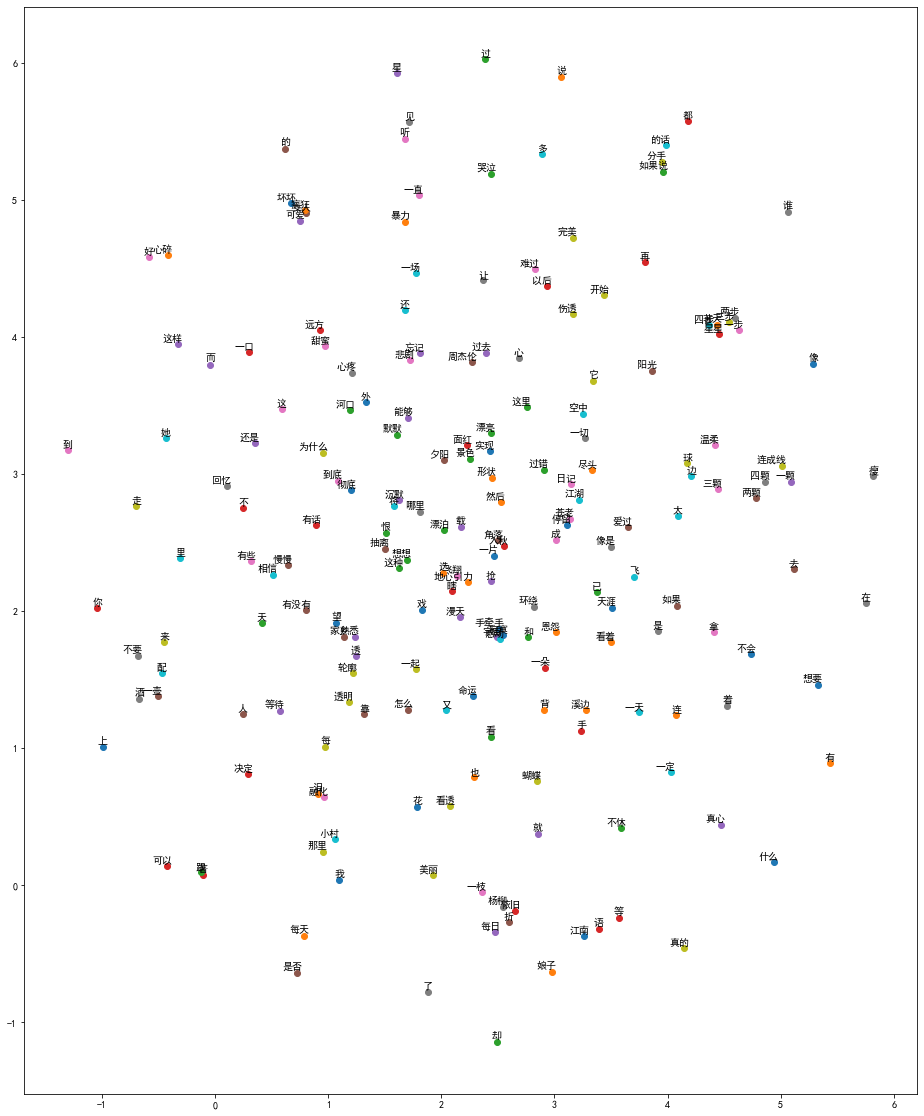

In [217]:
import matplotlib

#解决中文显示乱码的问题
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
def plot(embeddings,labels):
    plt.figure(figsize=(16,20))
    for i,label in enumerate(labels):
        x,y = embeddings[i,:]
        plt.scatter(x,y)
        plt.annotate(label,(x,y),xytext=(5,2),textcoords='offset points',ha='right',va='bottom')
    plt.show()
words = [index_to_word[i] for i in range(num_points)]
plot(two_d_embeddings,words)

<b>从上图，你能唱出几句周董的歌？</b>